# Liver Disease Prediction
The aim of this project is to predict whether a person is suffering from Liver Disease or not.



### Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


### Loading the dataset

In [ ]:
path="/content/liver.csv"
df=pd.read_csv(path)
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


###Reading the dataset

In [ ]:
#shape of the dataset

df.shape

(583, 11)

### Exploratory Data Analysis (EDA)

In [ ]:
#Basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Dataset,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


In [ ]:
#check for null values

df.isnull().sum()

,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,4


There are 4 null values in the feature Albumin_and_Globulin_Ratio which will need to be handled further

The number of patients diagnosed with liver disease: 416
The number of patients not diagnosed with liver disease: 167


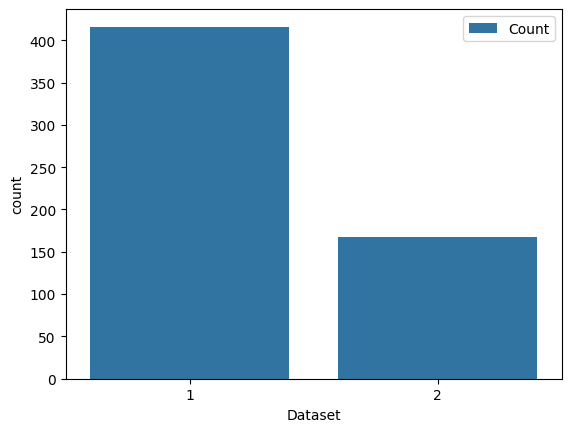

In [ ]:
# Countplot to see the number of unique values in the target column("Dataset")

sns.countplot(data = df, x = "Dataset", label = "Count")
LD, NLD = df["Dataset"].value_counts() #Return a Series containing the frequency of each distinct row in the Dataframe.
print("The number of patients diagnosed with liver disease: {}".format(LD))
print("The number of patients not diagnosed with liver disease: {}".format(NLD))

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,441
Female,142


<ipython-input-10-f8bc2b24c8ce>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  b = sns.countplot(data=df, x='Age', palette='husl')


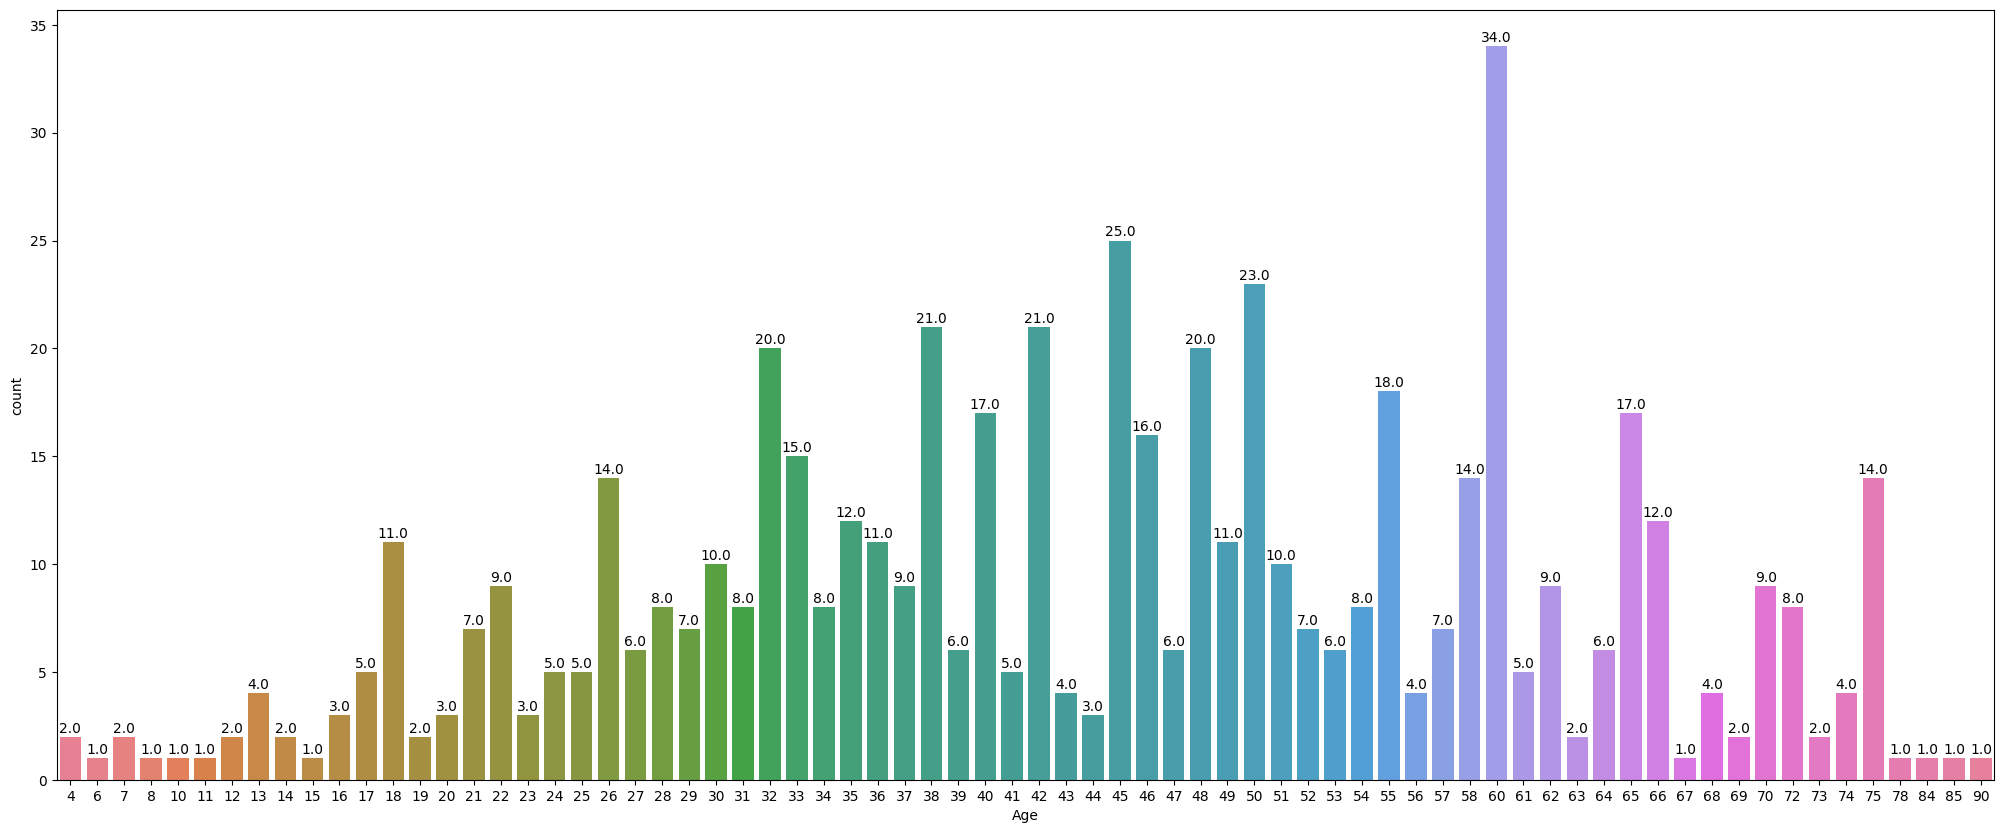

In [ ]:
plt.figure(figsize=(25,10))
b = sns.countplot(data=df, x='Age', palette='husl')
for bar in b.patches:
    b.annotate(format(bar.get_height()),
               (bar.get_x() + bar.get_width() / 2, bar.get_height()),
               ha='center', va='center', size=10, xytext=(0, 6),
               textcoords='offset points')
plt.show()

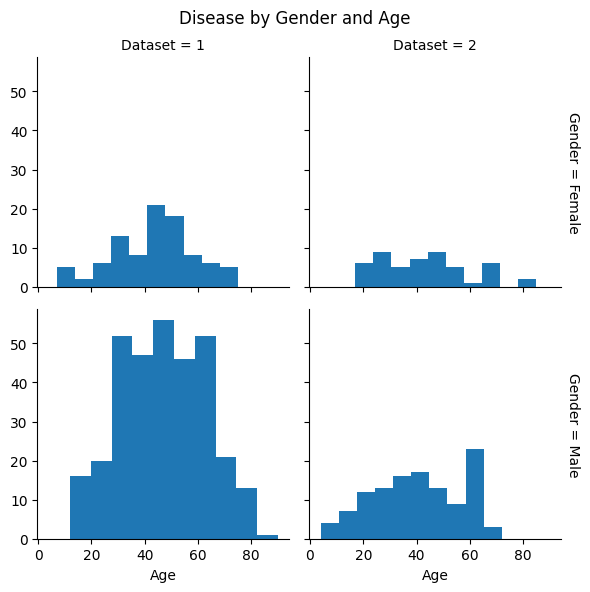

In [ ]:
# Histogram

g = sns.FacetGrid(df, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');

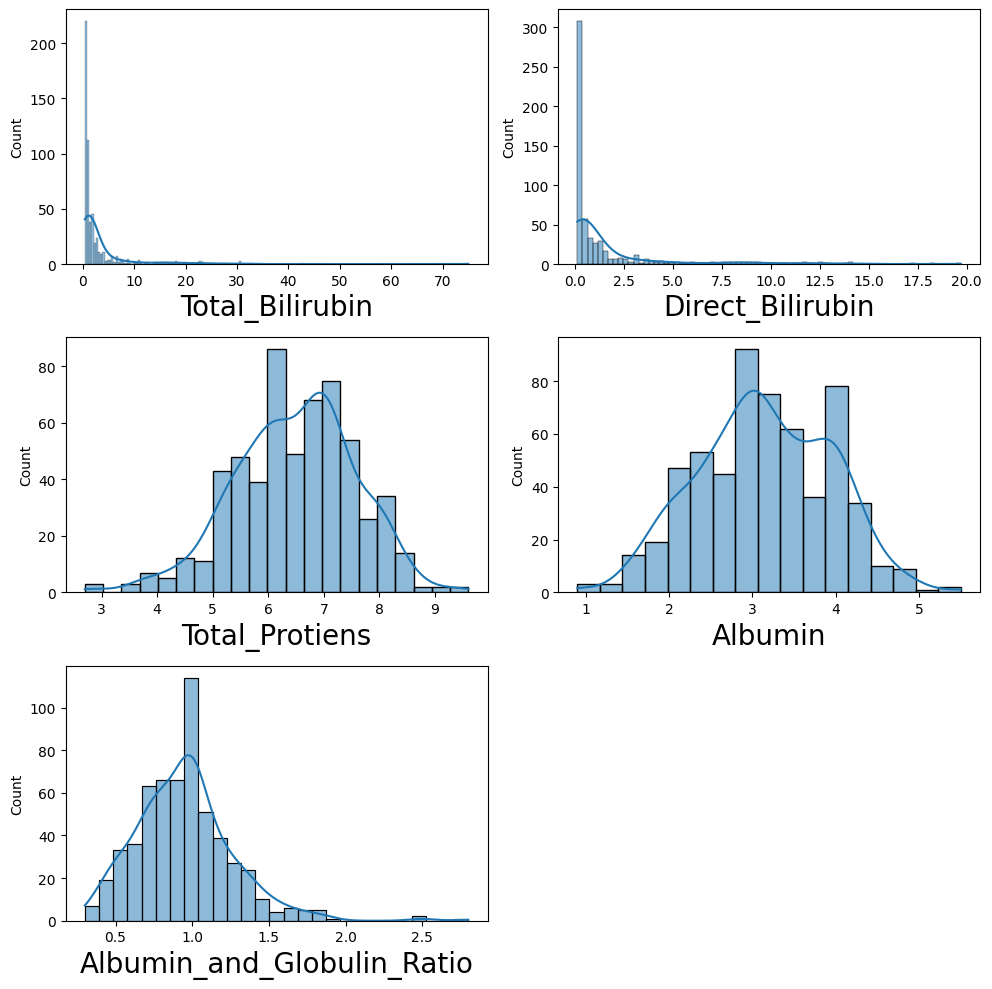

In [ ]:
#Histogram

dff = df[['Total_Bilirubin','Direct_Bilirubin','Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']]
plt.figure(figsize=(10,10))
plotnumber = 1

for column in dff:
    if plotnumber <=5:
        ax = plt.subplot(3,2,plotnumber)
        sns.histplot(data=dff, x=column, kde=True)
        plt.xlabel(column,fontsize=20)
        plotnumber +=1

plt.tight_layout()
plt.show()

In [ ]:
# Independent and Dependent feature for basic data analysis

x = df.drop(['Gender','Dataset'], axis=1)
Y = df['Dataset'] # 1 for liver disease; 2 for no liver disease

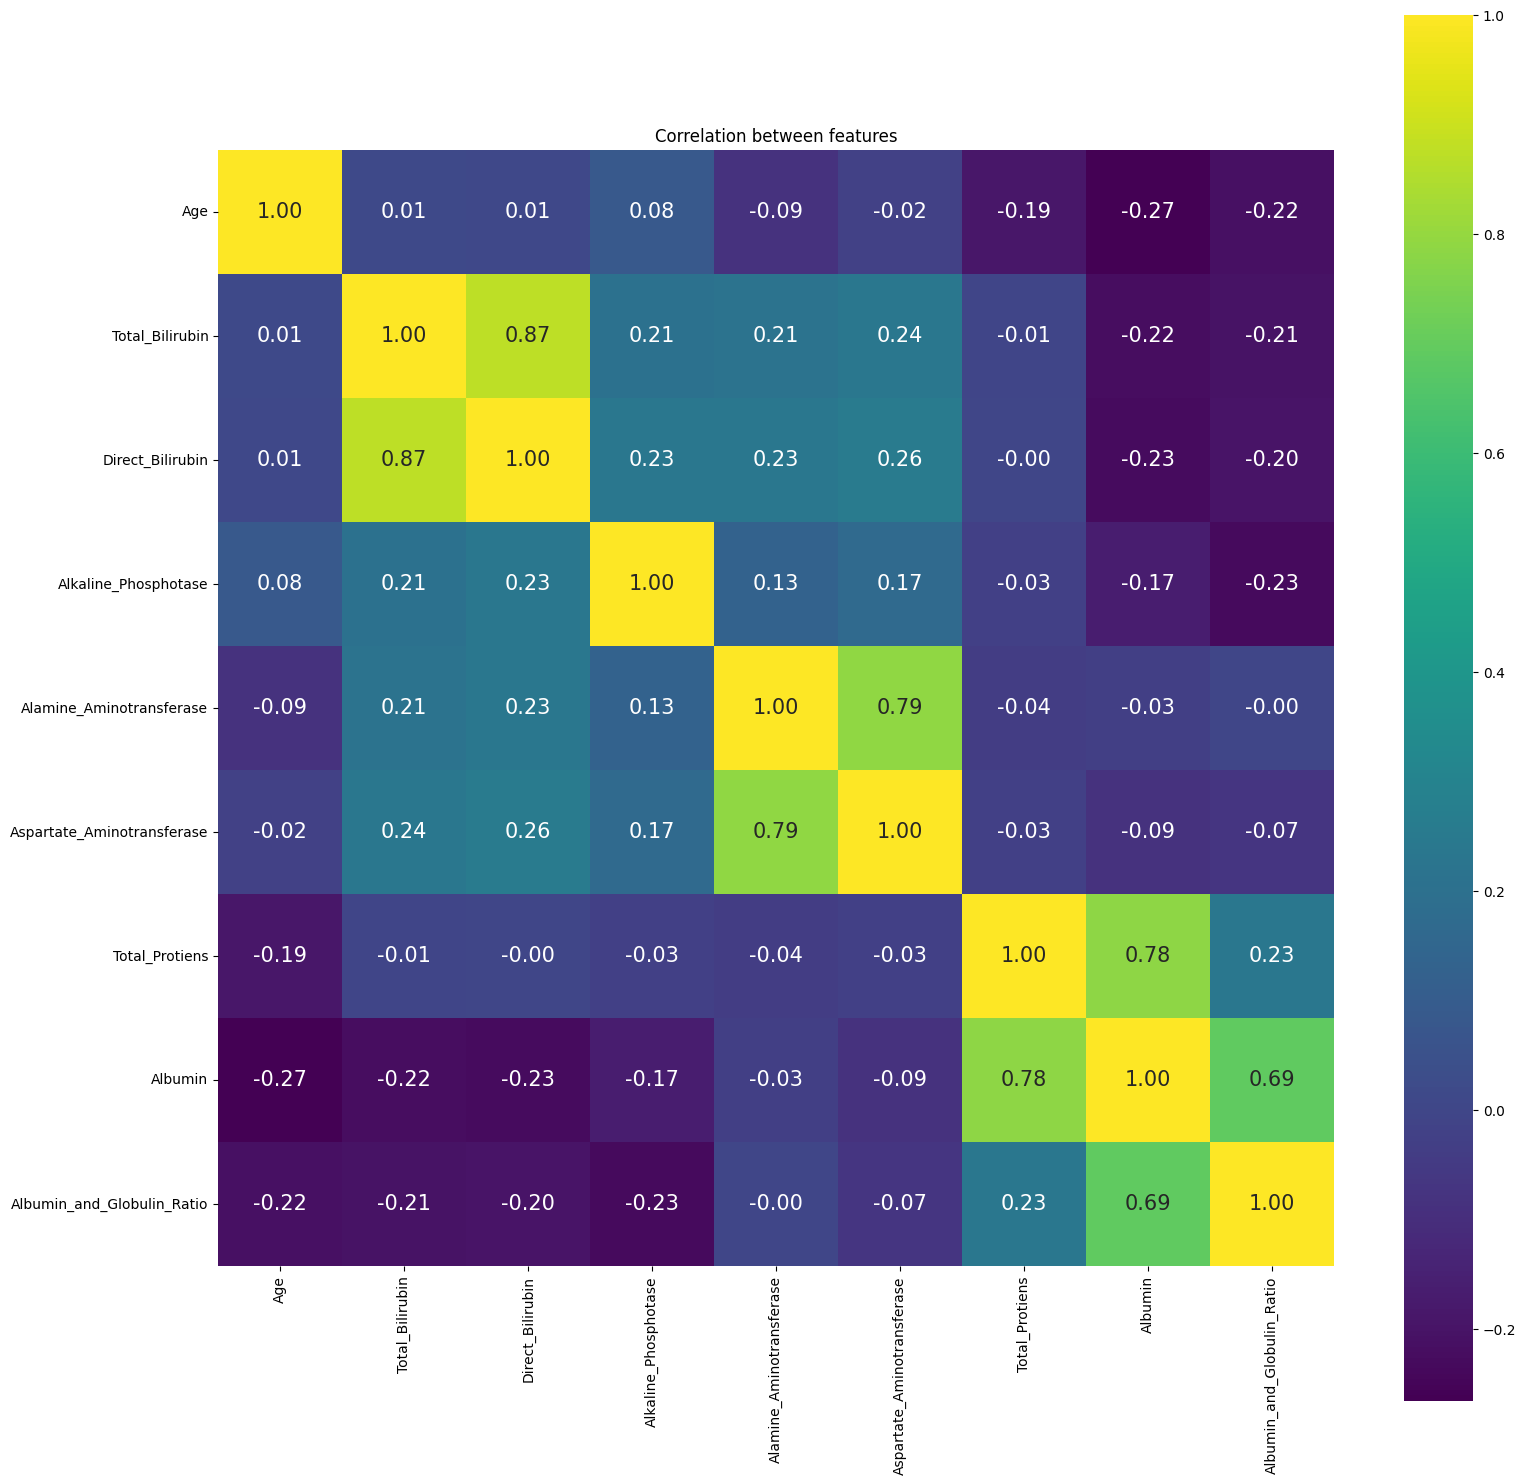

In [ ]:
# Heatmap showing the correlation between the independent features

liver_corr = x.corr()
plt.figure(figsize=(18,18))
sns.heatmap(liver_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'viridis')
plt.title('Correlation between features');

### Feature Engineering

In [ ]:
# Handling the missing values of the feature Albumin_and_Globulin_Ratio

df["Albumin_and_Globulin_Ratio"] = df.Albumin_and_Globulin_Ratio.fillna(df['Albumin_and_Globulin_Ratio'].mean())

In [ ]:
# Label Encoding for the Gender feature

df['Gender'] = df['Gender'].apply(lambda x:1 if x == 'Male' else 0)

In [ ]:
# Independent and Dependent features for Model Building

X=df[['Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']]
y=df['Dataset']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    int64  
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


###Model Building

In [ ]:
df.drop("Dataset", axis=1).apply(lambda x: x.corr(df['Dataset']))

,0
Age,-0.137351
Gender,-0.082416
Total_Bilirubin,-0.220208
Direct_Bilirubin,-0.246046
Alkaline_Phosphotase,-0.184866
Alamine_Aminotransferase,-0.163416
Aspartate_Aminotransferase,-0.151934
Total_Protiens,0.035008
Albumin,0.161388
Albumin_and_Globulin_Ratio,0.162319


In [ ]:
X = df.drop('Dataset', axis=1)
y = df['Dataset']

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scaling the feature columns
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [ ]:
# Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=21)


In [ ]:
#Shape of the train and test datasets
print('Shape training set: X:{}, y:{}'.format(X_train.shape, y_train.shape))
print('Shape test set: X:{}, y:{}'.format(X_test.shape, y_test.shape))

Shape training set: X:(408, 10), y:(408,)
Shape test set: X:(175, 10), y:(175,)


###Training a logistic regression model from **scratch**

Initialize weights and bias.

For each data point, compute
z=w⋅x+b

Apply the sigmoid function
ÿ=σ(z)

Compute loss using binary cross-entropy.

Update weights using gradient descent.

Repeat until convergence or max iterations.





Gradient Descent is an algorithm that is used to optimize the cost function or the error of the model. It is used to find the minimum value of error possible in your model. Gradient Descent can be thought of as the direction you have to take to reach the least possible error.

In [ ]:
#FROM SCRATCH
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        # Constructor initializes learning rate and number of iterations
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        # The sigmoid function converts log-odds to probability (0 to 1)
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # X: feature matrix (n_samples, n_features)
        # y: labels (n_samples,)
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)  # Initialize weights to 0
        self.bias = 0                        # Initialize bias

        for _ in range(self.n_iters):
            # Compute the linear model (dot product for feed forward)
            linear_model = np.dot(X, self.weights) + self.bias. #z=w⋅x+b
            # Apply sigmoid to get prediction probabilities
            y_predicted = self.sigmoid(linear_model)

            # Compute gradients (partial derivatives)
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias using gradient descent
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        # Apply the learned weights and bias
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        # Return binary prediction: 1 if prob > 0.5 else 0
        return [1 if i > 0.5 else 0 for i in y_predicted]


In [ ]:
# Train custom model
model = LogisticRegressionScratch()
model.fit(X_train, y_train)

###Evaluating scratch model

In [ ]:
# Predict and evaluate
predictions = model.predict(X_test)
accuracy = np.mean(predictions == y_test)
print("Accuracy:", accuracy)

# Print classification report
from sklearn.metrics import classification_report
print("\nClassification Report (From Scratch):")
print(classification_report(y_test, predictions))

Accuracy from scratch: 0.7828571428571428

Classification Report (From Scratch):
              precision    recall  f1-score   support

           1       0.78      1.00      0.88       137
           2       0.00      0.00      0.00        38

    accuracy                           0.78       175
   macro avg       0.39      0.50      0.44       175
weighted avg       0.61      0.78      0.69       175



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


###Training in-built logistic regression classifier

If the algorithm stops too early, you can increase tol (tolerance for stopping criteria)

Too strict of a convergence criterion (tol=1e-4) in default settings: Lower tol means the model keeps trying to optimize beyond practical improvement, getting stuck.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
logmodel = LogisticRegression(max_iter=200, tol=0.005)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=200, tol=0.005)

###Accuracy of the model

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = logmodel.predict(X_test)
accuracy_score(y_test, y_pred)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.83      0.90      0.86       137
           2       0.48      0.34      0.40        38

    accuracy                           0.78       175
   macro avg       0.66      0.62      0.63       175
weighted avg       0.76      0.78      0.76       175



###saving the trained model as a pickle file

In [ ]:
import pickle
# Save the trained model as a pickle file
model_filename = "logistic_regression_model.pkl"
with open(model_filename, 'wb') as model_file:
    pickle.dump(logmodel, model_file)

print(f"Model saved as {model_filename}")

# Load the model from the pickle file
with open(model_filename, 'rb') as model_file:
    loaded_model = pickle.load(model_file)

print("Model loaded successfully!")

custom_data = np.array([[45, 1, 0.8, 0.3, 200, 50, 30, 6.5, 3.1, 1.2]])

# Predict using the loaded model
prediction = loaded_model.predict(custom_data)
print("Prediction for custom data:", prediction)


Model saved as logistic_regression_model.pkl
Model loaded successfully!
Prediction for custom data: [1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
#from google.colab import files
#files.download("logistic_regression_model.pkl")